# Heart Disease Model Building Project
In this Term Project, the Heart Disease dataset will be analyzed to find out which feature(s) are the most related or most predictive of heart disease in the general population. The dataset can be downloaded from here: (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download. People die every year from heart disease (e.g., coronary artery disease, arrythmias, heart valve disease and heart failure). We will build and evaluate a logistic regression model to predict if a person has heart disease and describe which features are useful in predicting this. <br>


### Table of Contents 
$\bullet$  Exploring the Data <br>
$\bullet$  Preparing the Data for Modeling <br>
$\bullet$  Train and Evaluate the Model <br>

In [1]:
! pip install yellowbrick
import yellowbrick

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

In [3]:
#check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sklearn.__version__)
print('yellowbrick version:', yellowbrick.__version__)

pandas version: 1.2.4
numpy version: 1.19.5
scikit-learn version: 0.24.1
yellowbrick version: 1.3.post1


## Exploring the Data

In [4]:
#load the Titanic data into a dataframe
df = pd.read_csv('heart_2020_cleaned.csv') 
#display the first few rows of data
df.head(5)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [6]:
#display the dimensions of the dataframe
df.shape

(319795, 18)

### Observations

$\bullet$ The dataset has $319795$ rows and $18$ columns <br>
$\bullet$ All of the features will be useful in this analysis. Any categorical features will have dummy variables assigned to them for modeling <br>
$\bullet$ There is a mix of numerical and categorical data <br>
$\bullet$ The target of the model will be 'HeartDisease': No means no heart disease reported, Yes means heart disease reported

In [7]:
#look at the column data types
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [8]:
#get summary statistics of the numerical data
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [9]:
#get summary statistics of the non-numerical data
df.describe(include = ['O'])

HeartDisease Smoking AlcoholDrinking  Stroke DiffWalking     Sex  \
count        319795  319795          319795  319795      319795  319795   
unique            2       2               2       2           2       2   
top              No      No              No      No          No  Female   
freq         292422  187887          298018  307726      275385  167805   

       AgeCategory    Race Diabetic PhysicalActivity  GenHealth  Asthma  \
count       319795  319795   319795           319795     319795  319795   
unique          13       6        4                2          5       2   
top          65-69   White       No              Yes  Very good      No   
freq         34151  245212   269653           247957     113858  276923   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976

### Observations

$\bullet$ There is no missing data to deal with (all features have 319795 observations which make them complete) <br>

In [16]:
# Convert HeartDisease string to binary options (No is 0 and Yes is 1)
df['HeartDisease'] = df.HeartDisease.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [17]:
df.head(5)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0             0  16.60     Yes              No     No             3.0   
1             0  20.34      No              No    Yes             0.0   
2             0  26.58     Yes              No     No            20.0   
3             0  24.21      No              No     No             0.0   
4             0  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

### Numerical Data Feature Exploration

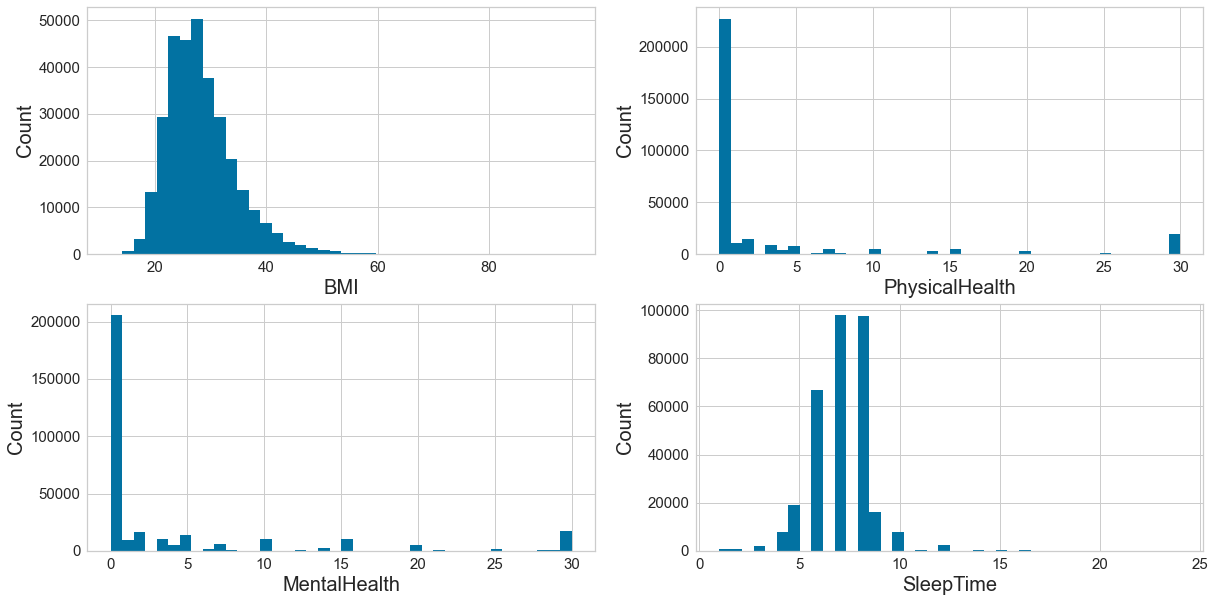

In [55]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    #ax.xaxis.label.set_color('white')
    ax.set_ylabel(yaxes[idx], fontsize=20)
   # ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', labelsize=15) #colors='white')
plt.show()

### Observations

$\bullet$ Most people in the dataset have a BMI between 20 and 40 <br>
$\bullet$ Most people in the dataset exercise between 0-5 days in the past 30 days <br>
$\bullet$ Most people in the dataset have 0-5 bad mental health days in the past 30 days <br>
$\bullet$ Most people in the dataset get between 5-9 hours of sleep a night <br>

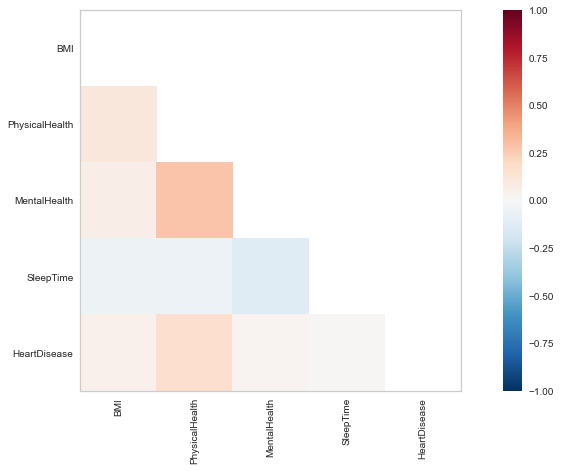

In [23]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

heat_map_features = num_features.copy()
#add 'Survived' to the heat map features
heat_map_features.append('HeartDisease')
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show()          

### Observations

$\bullet$ The numerical feature most highly correlated with 'HeartDisease' is 'PhysicalHealth' <br>
$\bullet$ There is not significant collinearity between the features (Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present)

### Categorical Data Feature Exploration

In [24]:
# To support the Spearman Correlation Matrix, create dummy variables for the object type columns to get all the drop-down options into their own columns
df2 = pd.concat([df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1), pd.get_dummies(df[['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']])], axis=1)
df2.head(5)

BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease  Smoking_No  \
0  16.60             3.0          30.0        5.0             0           0   
1  20.34             0.0           0.0        7.0             0           1   
2  26.58            20.0          30.0        8.0             0           0   
3  24.21             0.0           0.0        6.0             0           1   
4  23.71            28.0           0.0        8.0             0           1   

   Smoking_Yes  AlcoholDrinking_No  AlcoholDrinking_Yes  Stroke_No  ...  \
0            1                   1                    0          1  ...   
1            0                   1                    0          0  ...   
2            1                   1                    0          1  ...   
3            0                   1                    0          1  ...   
4            0                   1                    0          1  ...   

   GenHealth_Fair  GenHealth_Good  GenHealth_Poor  GenHealth_Very good  \
0               0               0               0                    1   
1               0               0               0                    1   
2               1               0               0                    0   
3               0               1               0                    0   
4               0               0               0                    1   

   Asthma_No  Asthma_Yes  KidneyDisease_No  KidneyDisease_Yes  SkinCancer_No  \
0          0           1                 1                  0              0   
1          1           0                 1                  0              1   
2          0           1                 1                  0              1   
3          1           0                 1                  0              0   
4          1           0                 1                  0              1   

   SkinCancer_Yes  
0               1  
1               0  
2               0  
3               1  
4               0  

[5 rows x 51 columns]

In [27]:
# move HeartDisease_Yes to the first column spot
column_to_reorder = df2.pop('HeartDisease')
df2.insert(0, 'HeartDisease', column_to_reorder)
df2.head(5)

HeartDisease    BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_No  \
0             0  16.60             3.0          30.0        5.0           0   
1             0  20.34             0.0           0.0        7.0           1   
2             0  26.58            20.0          30.0        8.0           0   
3             0  24.21             0.0           0.0        6.0           1   
4             0  23.71            28.0           0.0        8.0           1   

   Smoking_Yes  AlcoholDrinking_No  AlcoholDrinking_Yes  Stroke_No  ...  \
0            1                   1                    0          1  ...   
1            0                   1                    0          0  ...   
2            1                   1                    0          1  ...   
3            0                   1                    0          1  ...   
4            0                   1                    0          1  ...   

   GenHealth_Fair  GenHealth_Good  GenHealth_Poor  GenHealth_Very good  \
0               0               0               0                    1   
1               0               0               0                    1   
2               1               0               0                    0   
3               0               1               0                    0   
4               0               0               0                    1   

   Asthma_No  Asthma_Yes  KidneyDisease_No  KidneyDisease_Yes  SkinCancer_No  \
0          0           1                 1                  0              0   
1          1           0                 1                  0              1   
2          0           1                 1                  0              1   
3          1           0                 1                  0              0   
4          1           0                 1                  0              1   

   SkinCancer_Yes  
0               1  
1               0  
2               0  
3               1  
4               0  

[5 rows x 51 columns]

In [29]:
# Create a Spearman Correlation Matrix: Relationship between the categorical and non-categorical variables
df2.corr('spearman').style.background_gradient(cmap="Blues")

### Observations

$\bullet$ The categorical features most highly correlated with 'HeartDisease' are 'Stroke_Yes', 'DiffWalking_Yes', 'AgeCategory_80 or older', 'Diabetic_Yes', 'GenHealth_Fair', 'GenHealth_Poor', 'KidneyDisease_Yes' <br>
$\bullet$ There is not significant collinearity between the features (Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present)

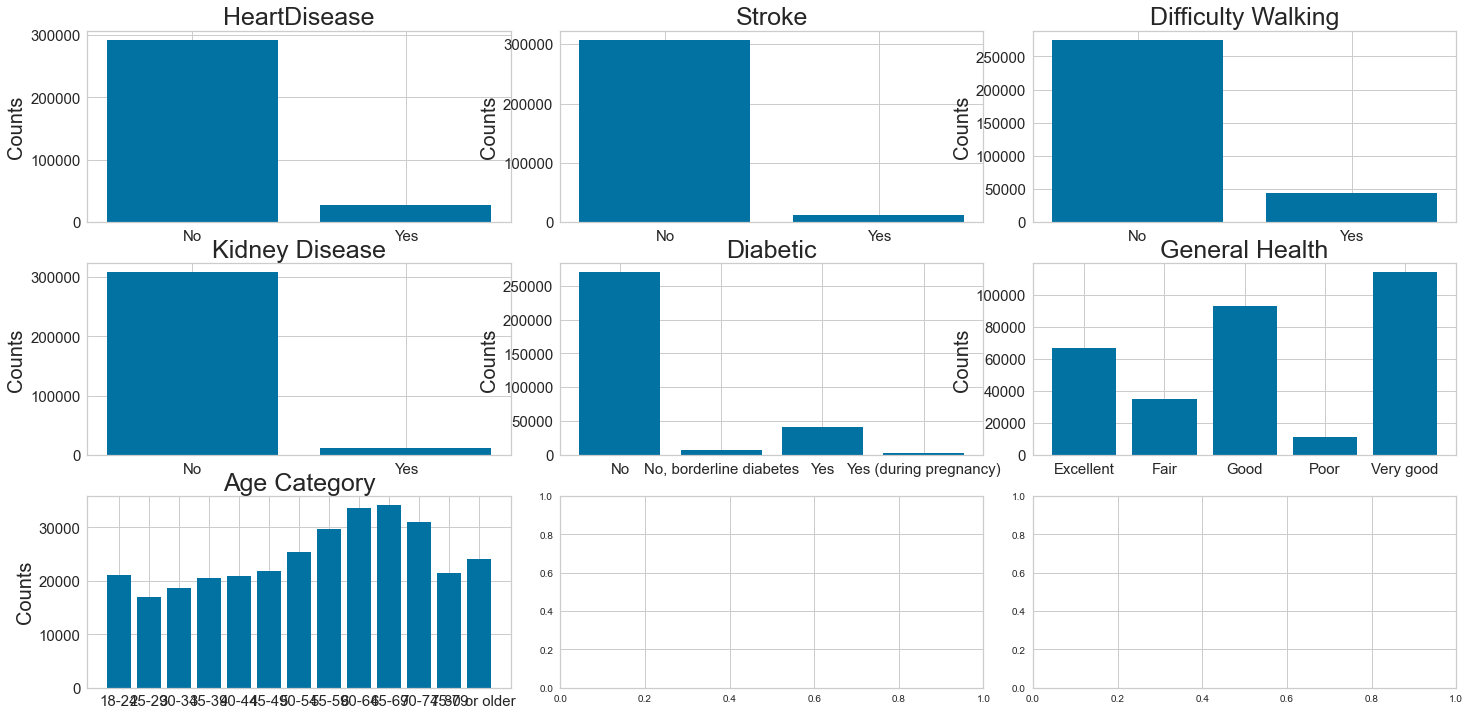

In [89]:
# create bar charts of some of the categorical features
#Categorical features with the highest correlation to HeartDisease: 'Stroke, 'DiffWalking', 'AgeCategory', 'Diabetic, 'GenHealth' 'KidneyDisease' 
#create a copy of the data frame for use with graphing
df_plots = df.copy()
df_plots = df.replace({'HeartDisease': {1: 'Yes', 0: 'No'}})

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.tight_layout()

# make the data read to feed into the visulizer
X_HeartDisease = df_plots.groupby('HeartDisease').size().reset_index(name='Counts')['HeartDisease']
Y_HeartDisease = df_plots.groupby('HeartDisease').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_HeartDisease, Y_HeartDisease)
axes[0, 0].set_title('HeartDisease', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Categorical features to use:'Stroke, 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth' 'KidneyDisease' 
# make the data read to feed into the visulizer
X_Smoking = df_plots.groupby('Stroke').size().reset_index(name='Counts')['Stroke']
Y_Smoking = df_plots.groupby('Stroke').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Smoking, Y_Smoking)
axes[0, 1].set_title('Stroke', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = df_plots.groupby('DiffWalking').size().reset_index(name='Counts')['DiffWalking']
Y_Sex = df_plots.groupby('DiffWalking').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 2].bar(X_Sex, Y_Sex)
axes[0, 2].set_title('Difficulty Walking', fontsize=25)
axes[0, 2].set_ylabel('Counts', fontsize=20)
axes[0, 2].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_AgeCategory = df_plots.groupby('AgeCategory').size().reset_index(name='Counts')['AgeCategory']
Y_AgeCategory = df_plots.groupby('AgeCategory').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2, 0].bar(X_AgeCategory, Y_AgeCategory)
axes[2, 0].set_title('Age Category', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Diabetic = df_plots.groupby('Diabetic').size().reset_index(name='Counts')['Diabetic']
Y_Diabetic = df_plots.groupby('Diabetic').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Diabetic, Y_Diabetic)
axes[1, 1].set_title('Diabetic', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_GenHealth = df_plots.groupby('GenHealth').size().reset_index(name='Counts')['GenHealth']
Y_GenHealth = df_plots.groupby('GenHealth').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 2].bar(X_GenHealth, Y_GenHealth)
axes[1, 2].set_title('General Health', fontsize=25)
axes[1, 2].set_ylabel('Counts', fontsize=20)
axes[1, 2].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_KidneyDisease = df_plots.groupby('KidneyDisease').size().reset_index(name='Counts')['KidneyDisease']
Y_KidneyDisease = df_plots.groupby('KidneyDisease').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_KidneyDisease, Y_KidneyDisease)
axes[1, 0].set_title('Kidney Disease', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
plt.show()

### Observations

$\bullet$ Most people in the dataset do not develop heart disease <br>
$\bullet$ Most people in the dataset do not develop stroke <br>
$\bullet$ Most people in the dataset do not have difficulty walking <br>
$\bullet$ Most people in the dataset do not have kidney disease <br>
$\bullet$ Most people in the dataset do not have diabetes, pre-diabetes or gestational diabetes <br>
$\bullet$ Most people in the dataset have Excellent, Good or Fair general health <br>
$\bullet$ The dataset age categories span from the lowest at 16955 (ages 25-29) and highest at 34151 (ages 65-59) <br>

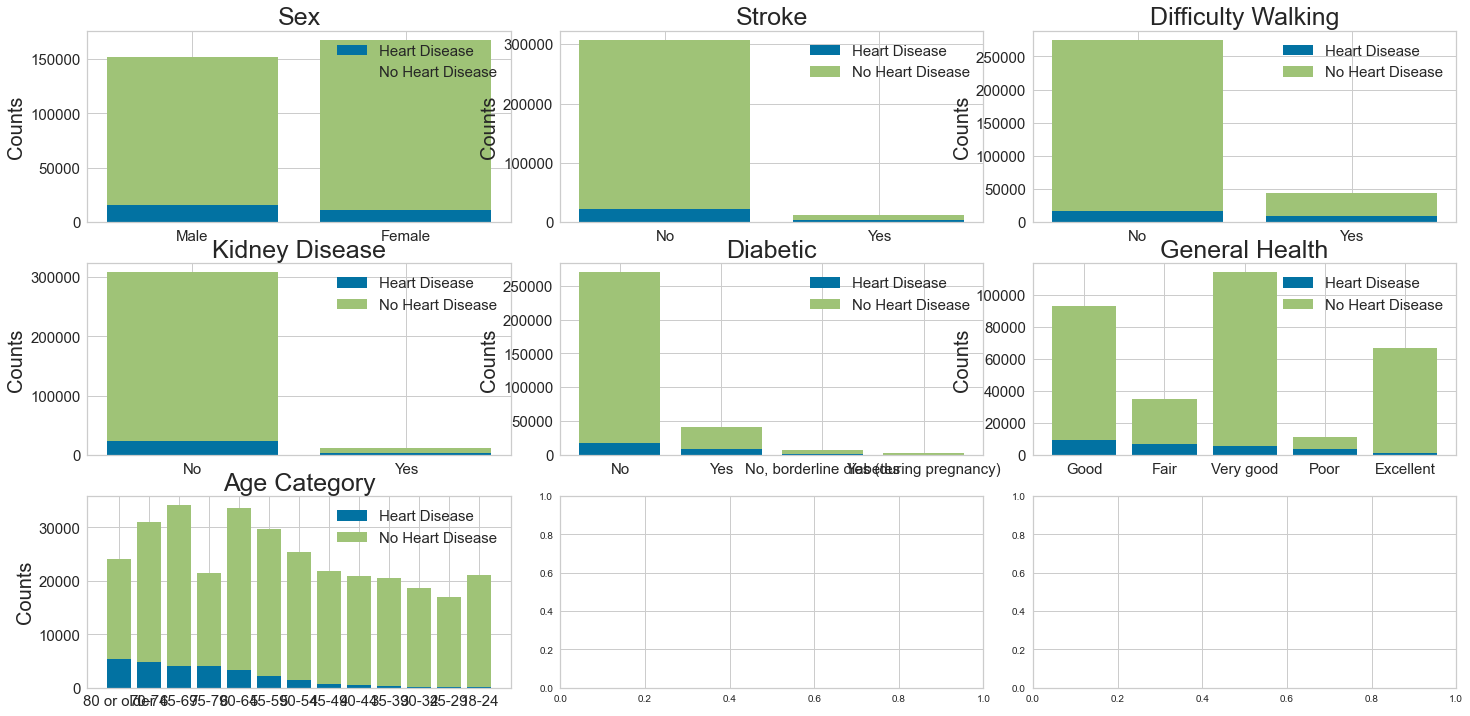

In [88]:
#stacked bar charts to compare heart disease and no heart disease by the most correlated features

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.tight_layout()

# make the data read to feed into the visulizer
Sex_heartdisease = df_plots[df['HeartDisease']==1]['Sex'].value_counts()
Sex_not_heartdisease = df_plots[df['HeartDisease']==0]['Sex'].value_counts()
Sex_not_heartdisease = Sex_not_heartdisease.reindex(index = Sex_heartdisease.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_heartdisease.index, Sex_heartdisease.values)
p2 = axes[0, 0].bar(Sex_not_heartdisease.index, Sex_not_heartdisease.values, bottom=Sex_heartdisease.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
Stroke_heartdisease = df_plots[df['HeartDisease']==1]['Stroke'].value_counts()
Stroke_not_heartdisease = df_plots[df['HeartDisease']==0]['Stroke'].value_counts()
Stroke_not_heartdisease = Stroke_not_heartdisease.reindex(index = Stroke_heartdisease.index)
# make the bar plot
p3 = axes[0, 1].bar(Stroke_heartdisease.index, Stroke_heartdisease.values)
p4 = axes[0, 1].bar(Stroke_not_heartdisease.index, Stroke_not_heartdisease.values, bottom=Stroke_heartdisease.values)
axes[0, 1].set_title('Stroke', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
DiffWalking_heartdisease = df_plots[df['HeartDisease']==1]['DiffWalking'].value_counts()
DiffWalking_not_heartdisease = df_plots[df['HeartDisease']==0]['DiffWalking'].value_counts()
DiffWalking_not_heartdisease = DiffWalking_not_heartdisease.reindex(index = DiffWalking_heartdisease.index)
# make the bar plot
p5 = axes[0, 2].bar(DiffWalking_heartdisease.index, DiffWalking_heartdisease.values)
p6 = axes[0, 2].bar(DiffWalking_not_heartdisease.index, DiffWalking_not_heartdisease.values, bottom=DiffWalking_heartdisease.values)
axes[0, 2].set_title('Difficulty Walking', fontsize=25)
axes[0, 2].set_ylabel('Counts', fontsize=20)
axes[0, 2].tick_params(axis='both', labelsize=15)
axes[0, 2].legend((p5[0], p6[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)


# make the data read to feed into the visualizer
Diabetic_heartdisease = df_plots[df['HeartDisease']==1]['Diabetic'].value_counts()
Diabetic_not_heartdisease = df_plots[df['HeartDisease']==0]['Diabetic'].value_counts()
Diabetic_not_heartdisease = Diabetic_not_heartdisease.reindex(index = Diabetic_heartdisease.index)
# make the bar plot
p7 = axes[1, 1].bar(Diabetic_heartdisease.index, Diabetic_heartdisease.values)
p8 = axes[1, 1].bar(Diabetic_not_heartdisease.index, Diabetic_not_heartdisease.values, bottom=Diabetic_heartdisease.values)
axes[1, 1].set_title('Diabetic', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
GenHealth_heartdisease = df_plots[df['HeartDisease']==1]['GenHealth'].value_counts()
GenHealth_not_heartdisease = df_plots[df['HeartDisease']==0]['GenHealth'].value_counts()
GenHealth_not_heartdisease = GenHealth_not_heartdisease.reindex(index = GenHealth_heartdisease.index)
# make the bar plot
p7 = axes[1, 2].bar(GenHealth_heartdisease.index, GenHealth_heartdisease.values)
p8 = axes[1, 2].bar(GenHealth_not_heartdisease.index, GenHealth_not_heartdisease.values, bottom=GenHealth_heartdisease.values)
axes[1, 2].set_title('General Health', fontsize=25)
axes[1, 2].set_ylabel('Counts', fontsize=20)
axes[1, 2].tick_params(axis='both', labelsize=15)
axes[1, 2].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
KidneyDisease_heartdisease = df_plots[df['HeartDisease']==1]['KidneyDisease'].value_counts()
KidneyDisease_not_heartdisease = df_plots[df['HeartDisease']==0]['KidneyDisease'].value_counts()
KidneyDisease_not_heartdisease = KidneyDisease_not_heartdisease.reindex(index = KidneyDisease_heartdisease.index)
# make the bar plot
p7 = axes[1, 0].bar(KidneyDisease_heartdisease.index, KidneyDisease_heartdisease.values)
p8 = axes[1, 0].bar(KidneyDisease_not_heartdisease.index, KidneyDisease_not_heartdisease.values, bottom=KidneyDisease_heartdisease.values)
axes[1, 0].set_title('Kidney Disease', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
Age_heartdisease = df_plots[df['HeartDisease']==1]['AgeCategory'].value_counts()
Age_not_heartdisease = df_plots[df['HeartDisease']==0]['AgeCategory'].value_counts()
Age_not_heartdisease = Age_not_heartdisease.reindex(index = Age_heartdisease.index)
# make the bar plot
p7 = axes[2, 0].bar(Age_heartdisease.index, Age_heartdisease.values)
p8 = axes[2, 0].bar(Age_not_heartdisease.index, Age_not_heartdisease.values, bottom=Age_heartdisease.values)
axes[2, 0].set_title('Age Category', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)
plt.show()

### Observations

$\bullet$ Most people in the dataset do not have heart disease, stroke, difficulty walking, kidney disease, or diabetes <br>
$\bullet$ Heart disease rates are relatively the same in both men and women (however women have slightly lower heart disease rate) <br>
$\bullet$ General Health and Age appear to be a significant factor in predicting heart disease <br>

## Preparing the Data for Modeling

In [31]:
#split the data into a training and test set
#we do this before making any modifications to the data to prevent data snooping
#drop 'HeartDisease' from the features as it is the target
X = df.drop(['HeartDisease'], axis = 1)
#get the target
y = df['HeartDisease']
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [32]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many survived and deaths are in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(255836, 17)
(63959, 17)
0    233954
1     21882
Name: HeartDisease, dtype: int64
0    58468
1     5491
Name: HeartDisease, dtype: int64


In [33]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [36]:
#verify there is no more missing data
print(X_train.isna().sum())
print(X_test.isna().sum())

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [37]:
#create a column for the log of the fares to reduce skew
#this is not totally necessary, but it is good to know how to log-transform variables
#X_train['log_fare'] = np.log1p(X_train['Fare'])
#X_test['log_fare'] = np.log1p(X_test['Fare'])

In [38]:
#look at a histogram of log_fare
#X_train['log_fare'].hist()
#plt.xlabel('log_fare')
#plt.ylabel('Counts')
#plt.show()

In [64]:
#create a new dataframe without Fare column (dropped Fare column because a new log_fare column was created)
#X_train.drop('Fare', axis = 1, inplace = True)
#X_test.drop('Fare', axis = 1, inplace = True)

In [39]:
#create dummy variables for the categorical columns 
#X_train = X_train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
#X_test = X_test.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
#get dummy variables for the categorical columns dropping the first dummy variable
#we drop the first dummy variable, so we get one fewer than the number of categories
#this prevents collinearity between the dummy variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [40]:
#check dimensions of the training and test feature matrices
print(X_train.shape)
print(X_test.shape)
#view the training features
X_train.head()

(255836, 37)
(63959, 37)


BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_Yes  \
0  29.84             0.0           0.0        6.0            0   
1  26.26             0.0           0.0        8.0            1   
2  27.60             0.0           0.0        7.0            1   
3  20.77            30.0           0.0        8.0            0   
4  27.46            10.0           0.0        6.0            1   

   AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
0                    0           0                0         1   
1                    0           0                0         0   
2                    0           0                0         1   
3                    0           0                0         0   
4                    0           0                1         0   

   AgeCategory_25-29  ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  \
0                  0  ...             0                                0   
1                  0  ...             0                                0   
2                  0  ...             0                                0   
3                  0  ...             0                                0   
4                  0  ...             0                                0   

   PhysicalActivity_Yes  GenHealth_Fair  GenHealth_Good  GenHealth_Poor  \
0                     0               0               1               0   
1                     1               0               0               0   
2                     0               0               0               0   
3                     0               0               1               0   
4                     0               0               1               0   

   GenHealth_Very good  Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  
0                    0           0                  0               0  
1                    1           0                  0               1  
2                    1           0                  0               0  
3                    0           0                  0               1  
4                    0           0                  0               0  

[5 rows x 37 columns]

### Summary of Data Preparation Steps

$\bullet$ Created dummy variables for the categorical data <br>
$\bullet$ Split data into training and test sets

# Train and Evaluate the Model

In [41]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [42]:
#instantiate the logistic regression model 
logreg_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logreg_model.fit(X_train, y_train)

C:\Users\kadams\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

Model Accuracy: 91.52%


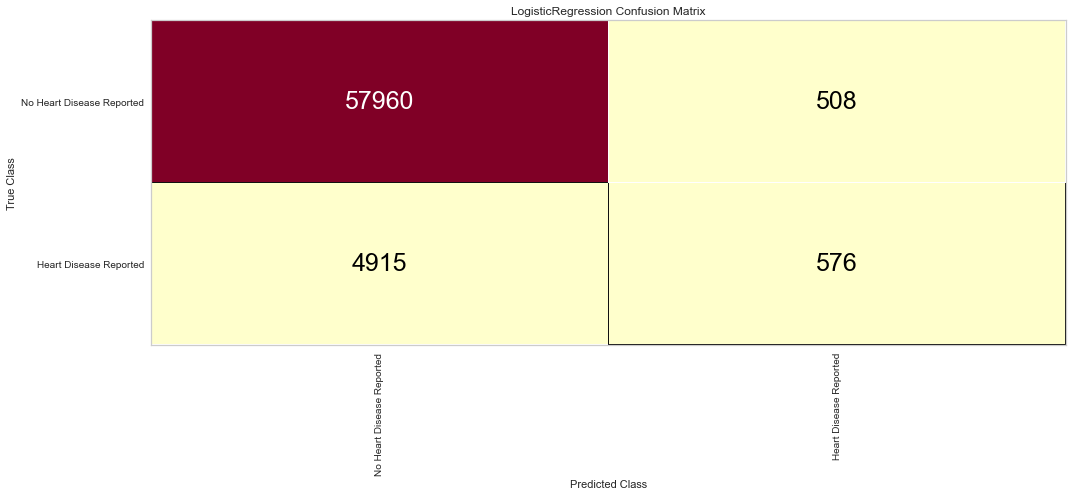

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [44]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(logreg_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

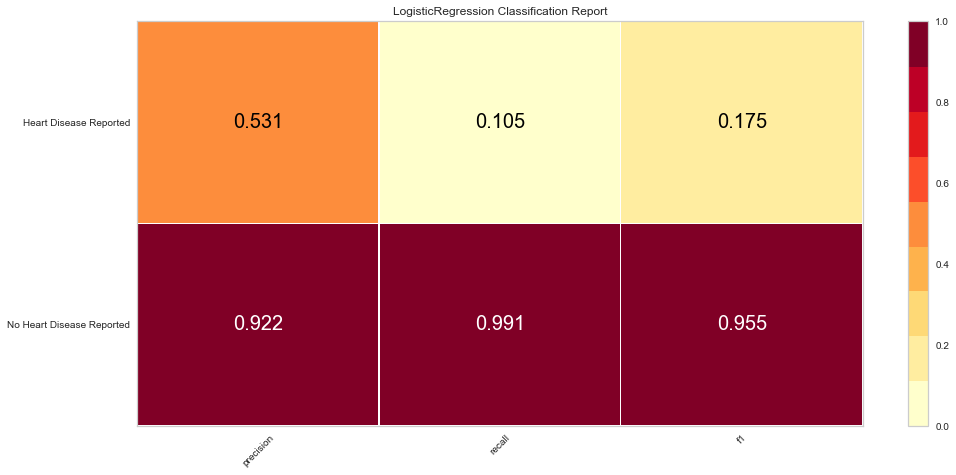

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [45]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logreg_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

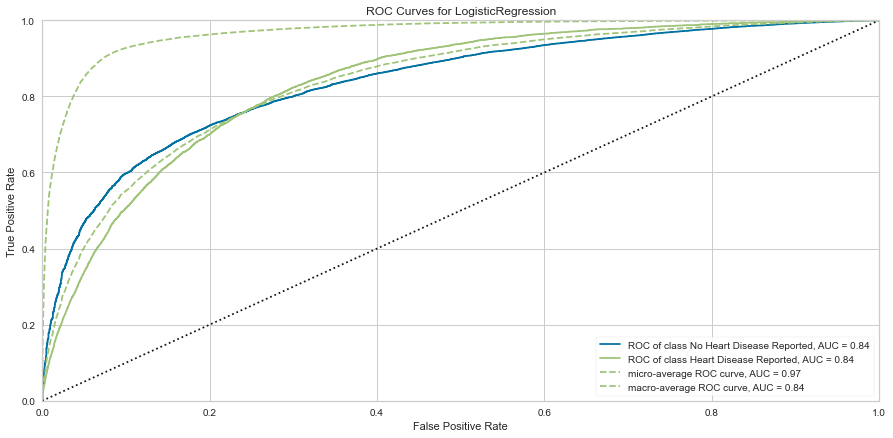

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logreg_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

### Conclusions

$\bullet$ Logistic Regression model predicts heart disease with approximately $91\%$ accuracy <br>
$\bullet$ Classification report and ROC curve all suggest the model has strong predictive power <br>

### TO EDIT
$\bullet$ Gender, passenger class, fare, and age are useful in predicting survival
$\bullet$ Passenger class and gender play an important role in predicting if a Titanic passenger survived <br>